In [88]:
"""
Program Name - diabetes_regression.ipynb

Author: Tomasz Bronewicz
Latest Version: 1.0
Date: 19/05/2024

Changes: 
v1.0 - Initial version - Tomasz Broniewicz

============Description===========

Program that shows the uses multiple linear regression 
of the diabetes data for prediction

===================================
"""

'\nProgram Name - diabetes_regression.ipynb\n\nAuthor: Tomasz Bronewicz\nLatest Version: 1.0\nDate: 19/05/2024\n\nChanges: \nv1.0 - Initial version - Tomasz Broniewicz\n\n============Description===========\n\nProgram that shows the uses multiple linear regression \nof the diabetes data for prediction\n\n===================================\n'

In [89]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Import the dataset
data = pd.read_csv("diabetes_dirty.csv")
data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,PROGRESSION
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


<Axes: >

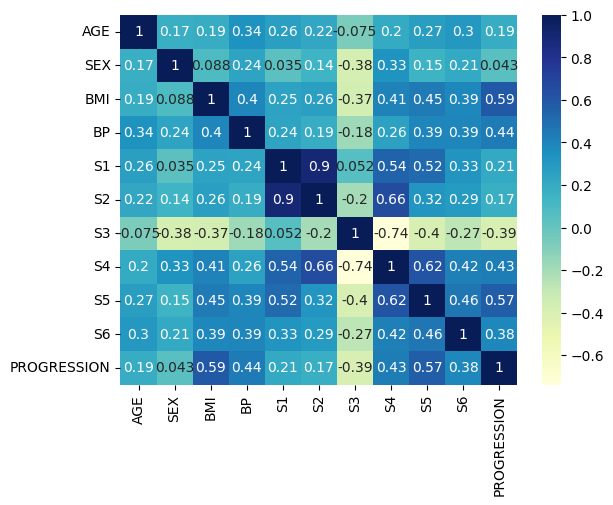

In [90]:
# check the correlation to find if all of the independent variables are needed
sns.heatmap(data.corr(), annot = True, cmap = "YlGnBu")

The correlation in regard to our Target variable shows that we will use BMI,BP,S3,S4,S5,S6 as all of signal the moderate correlation

In [91]:
# Define independent variables
X_feature = data.drop(['AGE','SEX','S1','S2','PROGRESSION'], axis= 1)
# Define dependent variables
y_target = data['PROGRESSION']

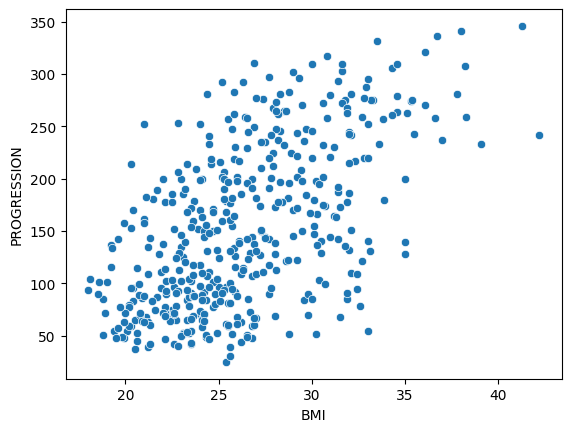

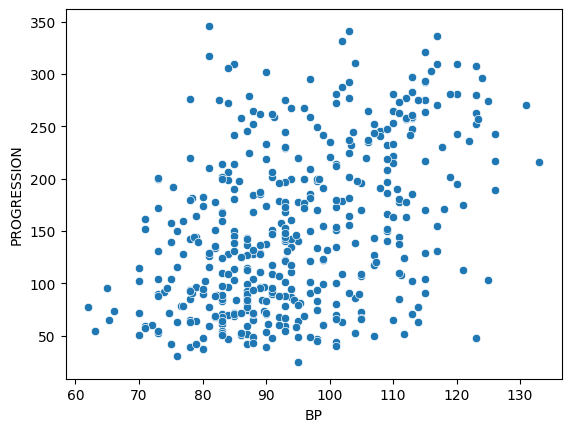

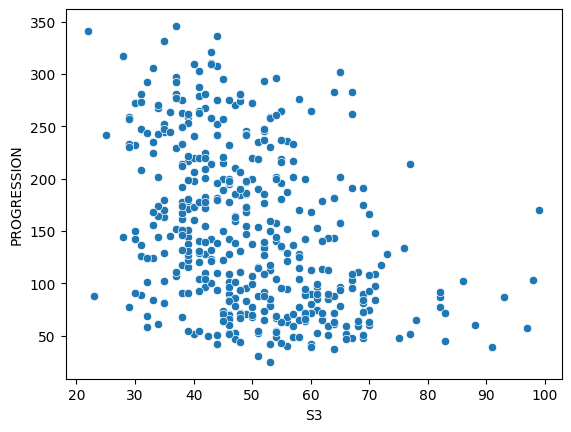

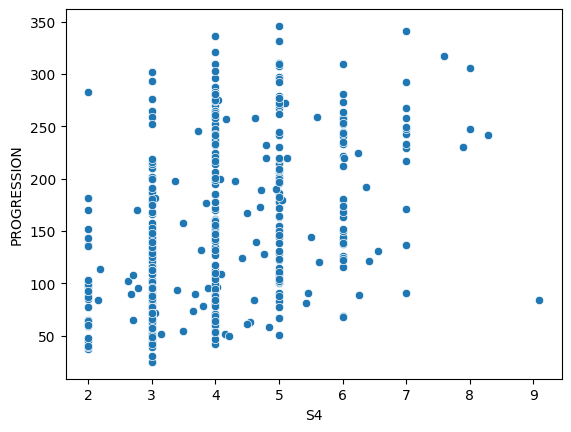

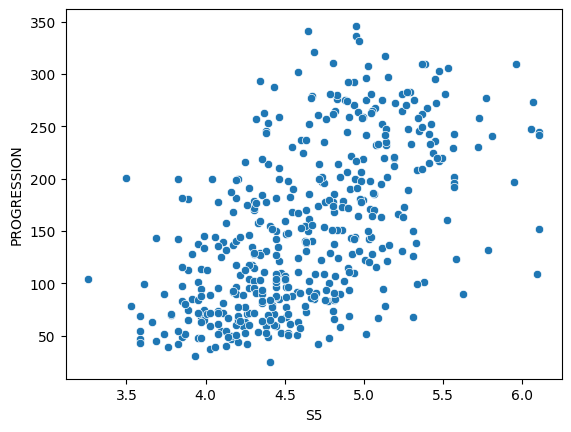

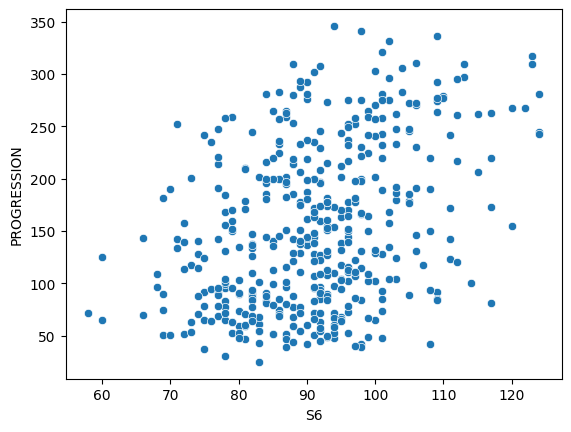

In [92]:
# check the tendencies accros the variables and target data
for col in X_feature.columns:
  sns.scatterplot(data = X_feature, x = col, y = y_target)
  plt.show()

In [93]:
# Create empty linear regression model
reg_model = LinearRegression()

#Fit data to the model 
reg_model.fit(X_feature, y_target)

# Extracting constants
print('Intercept: ', reg_model.intercept_)
print('Coefficients: ', reg_model.coef_)

Intercept:  -256.860431485077
Coefficients:  [ 5.97391801  0.89428743 -1.0162028  -5.43011923 48.08641763  0.17854176]


Training and Testing Samples

In [94]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, test_size=0.2, random_state=42)

print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)

Training data: (353, 6) (353,)
Test data: (89, 6) (89,)


Check for feature scailng and find out which is necessary

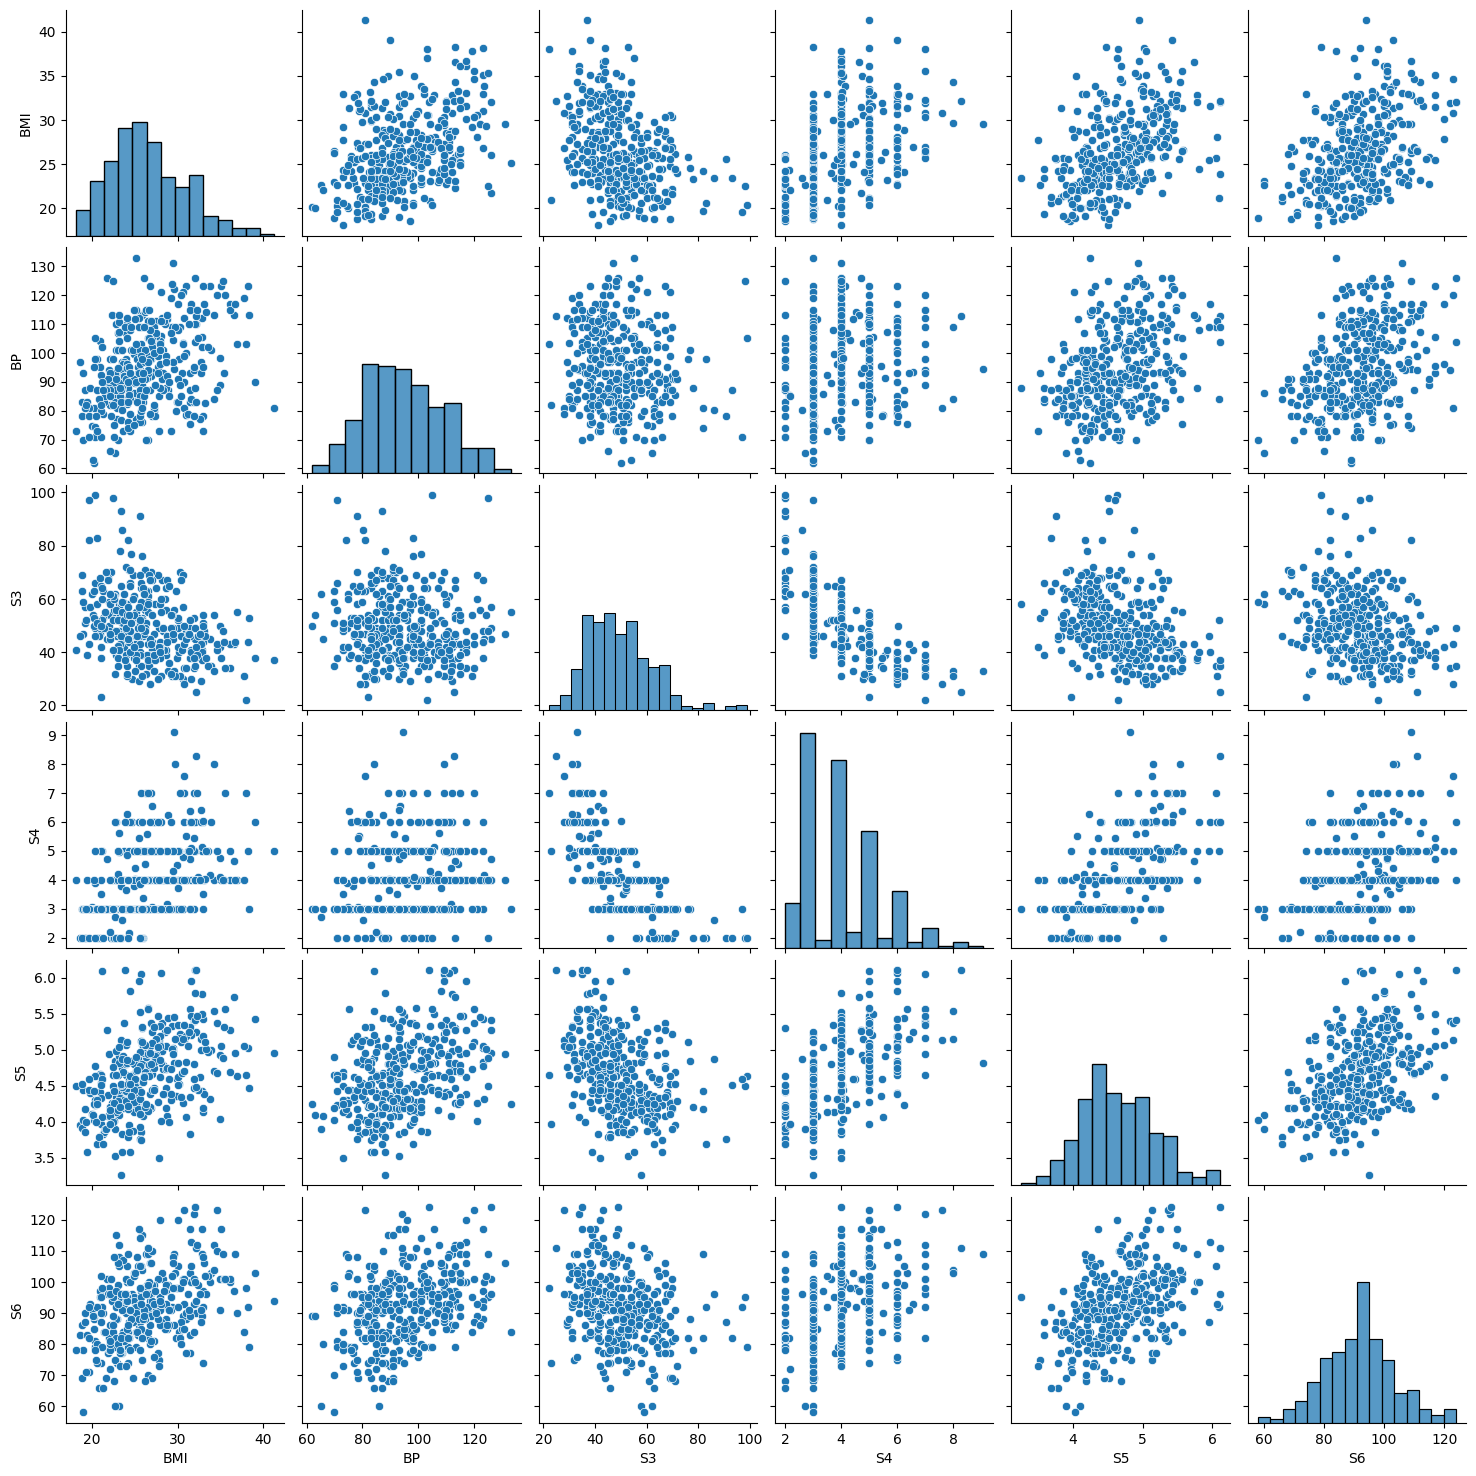

In [95]:
#Generating pairplot for distribution assessment
sns.pairplot(data= X_train )

As the results shows that tendency for the data is the Standard distribution we will use the StandardScaler function

In [96]:
# import library for scaling
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler
standard_scaler = StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

In [97]:
# Fit linear regression model on Standard scaled data
reg_model_standard = LinearRegression()
reg_model_standard.fit(X_train_standard, y_train)
y_pred_standard = reg_model_standard.predict(X_test_standard)

# Extracting constants
print('Intercept: ', reg_model_standard.intercept_)
print('Coefficients: ', reg_model_standard.coef_)


Intercept:  153.73654390934843
Coefficients:  [ 28.1743364   14.14092929 -15.00231848  -7.92769726  22.93552207
   1.83293693]


In [98]:
# Generate predictions
y_pred_standard = reg_model_standard.predict(X_test_standard)
# Display the predictions
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_standard})
print(predictions.head())

     Actual   Predicted
287     219  146.618646
211      70  174.536134
72      202  167.812042
321     230  256.291801
73      111  132.309037


In [99]:
#import necessary libraries for evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse_standard = mean_squared_error(y_test, y_pred_standard)
r2_standard = r2_score(y_test, y_pred_standard)

print("Standard Scaler - MSE: ", mse_standard)
print("Standard Scaler - R2 Score: ", r2_standard)

Standard Scaler - MSE:  2931.0406900974726
Standard Scaler - R2 Score:  0.44678053230202064
